# Games on Google Play Store

## Import libraries and dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as stt
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('googleplaystore.csv')

In [4]:
data.shape

(10841, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


***Columns Description:***
App - Application name
Category - Category the app belongs to
Rating - Overall user rating of the app
Reviews - Number of user reviews for the app
Size - Size of the app
Installs - Number of user downloads/installs for the app
Type - Paid or Free
Price - Price of the app
Content Rating - Age group the app is targeted at - Children / Mature 21+ / Adult
Genres - An app can belong to multiple genres
Last Updated - Date when the app was last updated on Play Store
Current Ver - Current version of the app available on Play Store
Android Ver - Min required Android version

## Data cleaning and standardizing

### Transform 'Size' to the Numerical data

In [8]:
data.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [9]:
def f(x):
    if x[-1]=='M':
        res = float(x[:-1])*1024
    elif x[-1]=='k':
        res = float(x[:-1])
    else:
        res = np.nan
    return res
new_size = data.Size.apply(f)

### Drop strange app (row)

In [10]:
data[data.Size=='1,000+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


This app has the Size = 1,000+ and rating = 19.0 and that's not accuracy, so we drop it.

In [11]:
data = data[data.Rating!=19]
data['Size'] = new_size

In [12]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Standardize columns 'Install' and 'Reviews"

In [13]:
def inst(x):
    if x[-1]=='+':
        res = float(x[:-1].replace(',',''))
    else:
        res = float(x)
    return res

def rev(x):
    res = int(x)
    return res

def prc(x):
    if x[0] == '$':
        res = float(x[1:])
    else:
        res = float(x)
    return res

new_installs = data.Installs.apply(inst)
new_reviews = data.Reviews.apply(rev)
new_prices = data.Price.apply(prc)

data['Installs'] = new_installs
data['Reviews'] = new_reviews
data['Price'] = new_prices

In [14]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8908.8,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2867.2,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Let's explore the 'Game' Category

In [15]:
game_data = data[data['Category']=='GAME']

In [27]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 1653 to 10804
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1144 non-null   object 
 1   Category        1144 non-null   object 
 2   Rating          1097 non-null   float64
 3   Reviews         1144 non-null   int64  
 4   Size            1015 non-null   float64
 5   Installs        1144 non-null   float64
 6   Type            1144 non-null   object 
 7   Price           1144 non-null   float64
 8   Content Rating  1144 non-null   object 
 9   Genres          1144 non-null   object 
 10  Last Updated    1144 non-null   object 
 11  Current Ver     1144 non-null   object 
 12  Android Ver     1144 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 125.1+ KB


In [16]:
game_data.describe()

,Rating,Reviews,Size,Installs,Price
count,1097.000000,1.144000e+03,1015.000000,1.144000e+03,1144.000000
mean,4.286326,1.385859e+06,45434.946601,3.066960e+07,0.251136
std,0.365375,4.160903e+06,28407.444831,9.697630e+07,1.245903
min,1.000000,0.000000e+00,116.000000,1.000000e+00,0.000000
25%,4.100000,2.463000e+03,22528.000000,1.000000e+05,0.000000
50%,4.400000,5.848100e+04,40960.000000,1.000000e+06,0.000000
75%,4.500000,6.432590e+05,64512.000000,1.000000e+07,0.000000
max,5.000000,4.489389e+07,102400.000000,1.000000e+09,17.990000


In [17]:
game_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,68608.0,1.000000e+08,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,77824.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,75776.0,5.000000e+08,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258,23552.0,1.000000e+07,Free,0.0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,47104.0,1.000000e+07,Free,0.0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


### Let's find out What is the top 'Installs' grouped by 'Genres'?

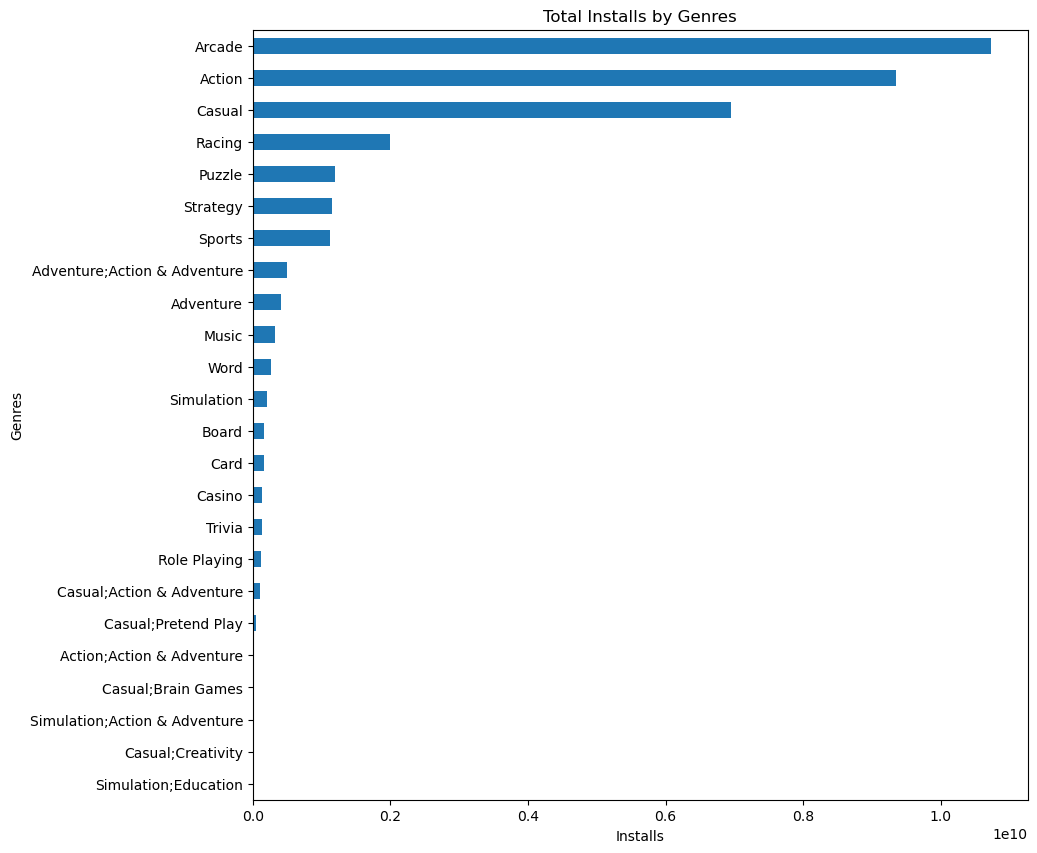

In [18]:
fig = plt.figure(figsize=(10, 10))
game_data['Installs'].groupby(game_data['Genres']).sum().sort_values().plot(kind='barh')
plt.xlabel('Installs')
plt.ylabel('Genres')
plt.title('Total Installs by Genres')
plt.show()

We can see that the leaders are Arcade, Action and Casual. 

### Let's see will is it the same for Genres/Review through Corrplot?

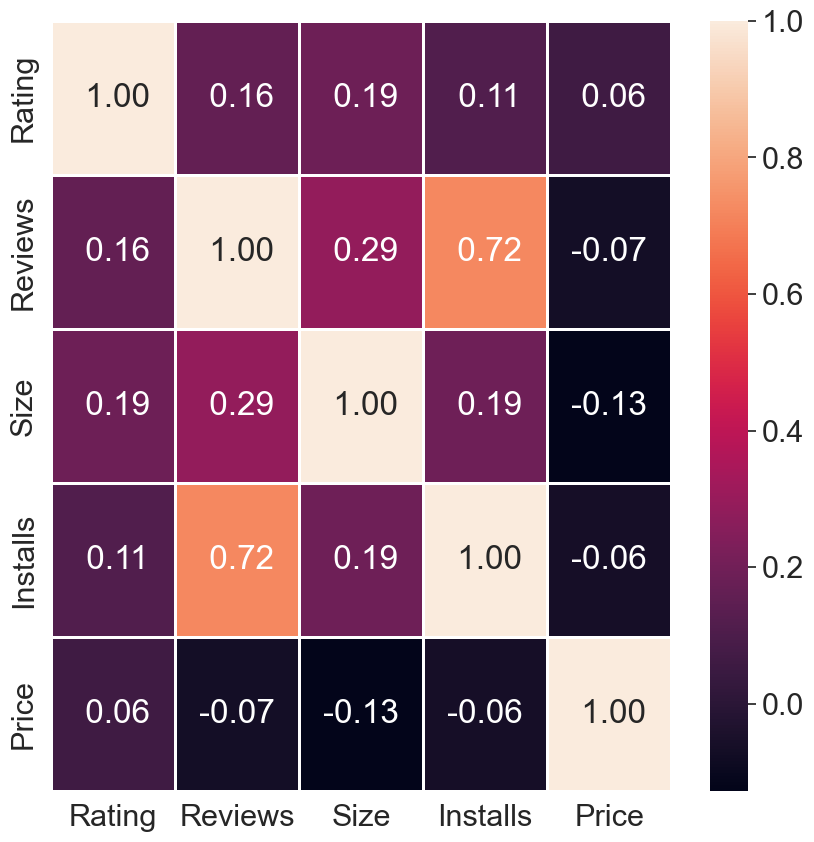

In [19]:
fig = plt.figure(figsize(10,10))
sns.set(style='white', font_scale=2)
sns.heatmap(game_data.dropna()[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].corr(), fmt=' .2f', annot=True, linewidth=2);

There is very high correlation between Reviews and Installs. We also can see that some weak correlations between Reviews/Size and Reviews/Rating. It's logic because apps often ask users for writing a review about their product.

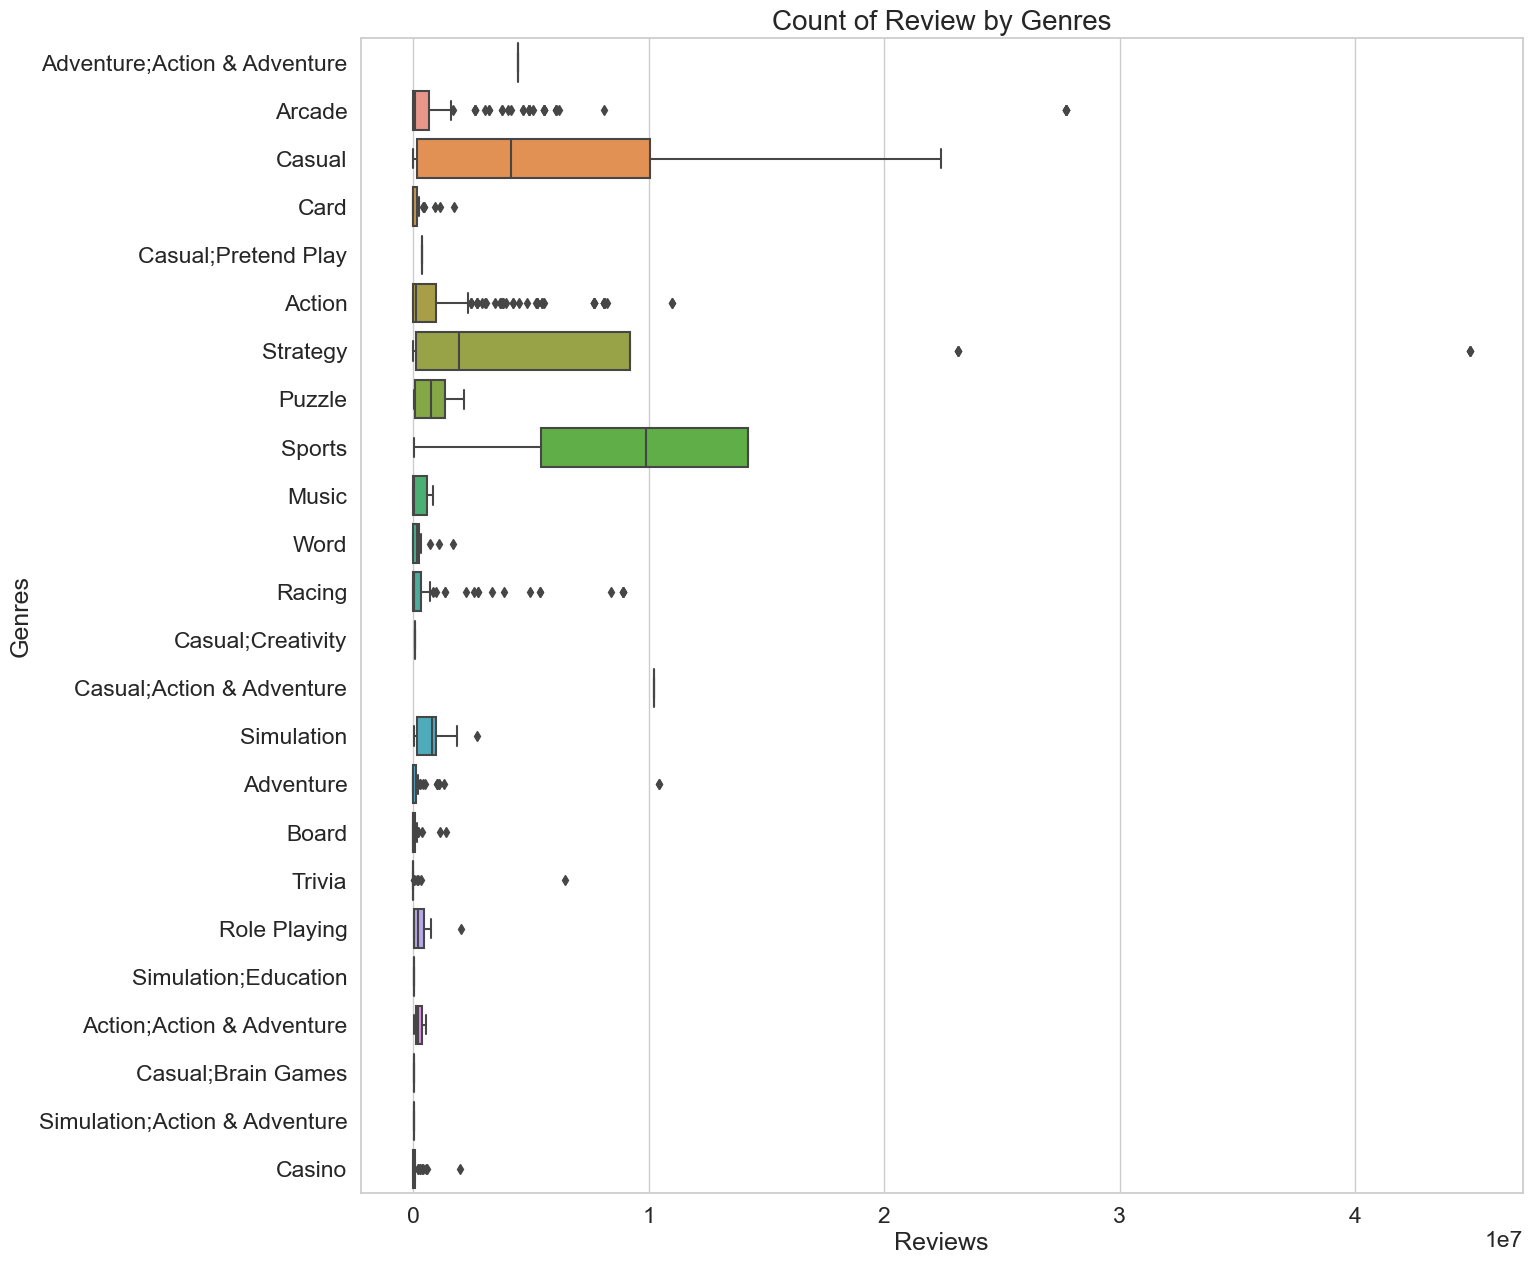

In [68]:
fig = plt.figure(figsize(15,15))
plt.title('Count of Review by Genres', fontsize=20)
sns.boxplot(x='Reviews', y = 'Genres', data=game_data);

Arcade and Action are not in the top anymore, the leaders in Reviews are Casual, Strategy and Sports. We can see that Puzzle game have many installings but few reviews comparing to Strategy and Sport.

### Let's see the difference between Paid and Free apps

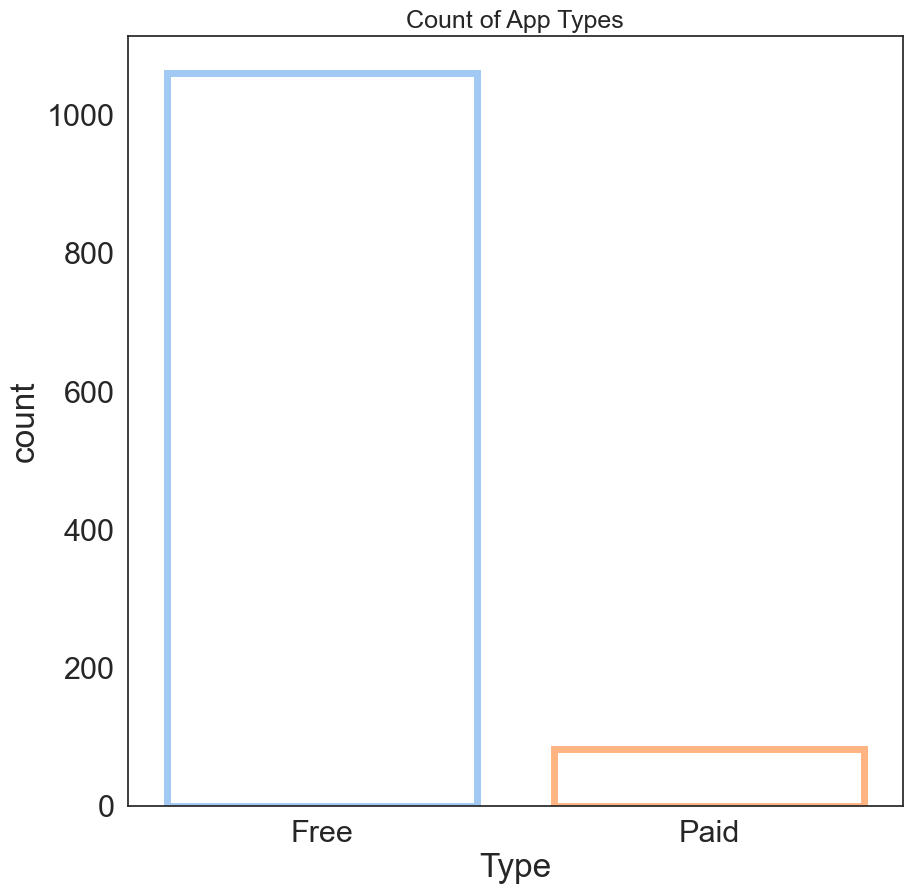

In [22]:
fig = plt.figure(figsize(10,10))
plt.title('Count of App Types', fontsize=18)
sns.set(font_scale=2)
sns.countplot(game_data.Type, facecolor=(0, 0, 0, 0) , linewidth=5, \
edgecolor=sns.color_palette("pastel", 3));

It is high difference between free and paid apps. A lot of free games in addition to advertising into app, have got in-game currency, that the user can buy for real money.

### Let's explore the relationship between Content Rating and Installs

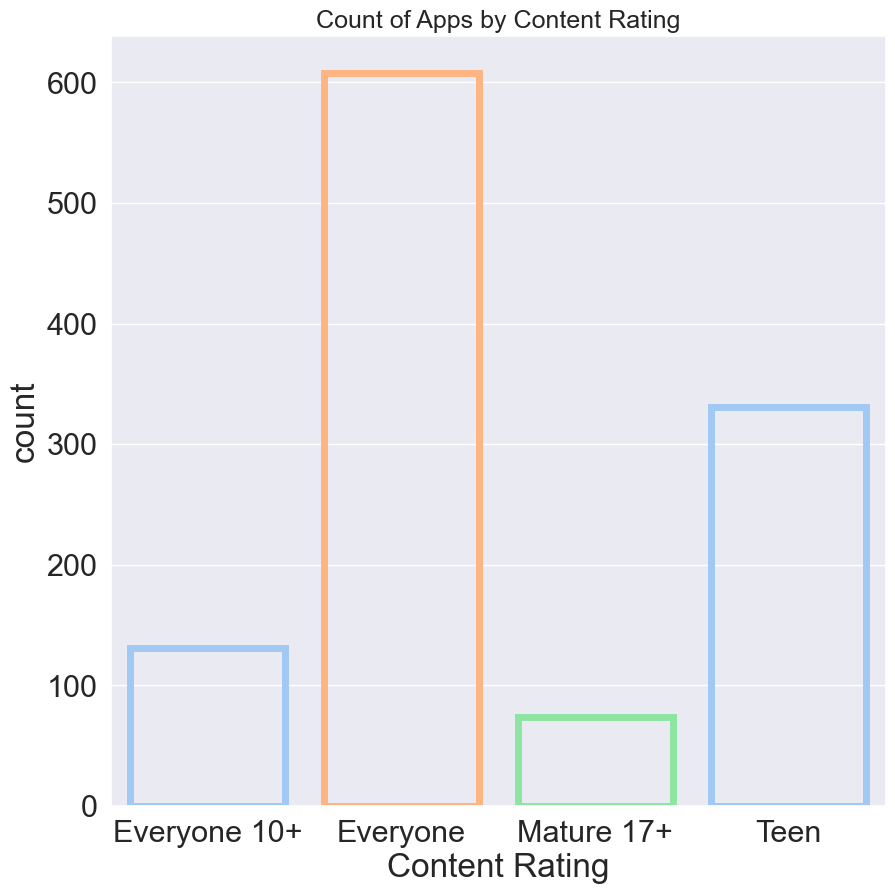

In [49]:
fig = plt.figure(figsize(10,10))
plt.title('Count of Apps by Content Rating', fontsize=18)
sns.set(font_scale=2)
sns.countplot(game_data['Content Rating'], facecolor=(0, 0, 0, 0) , linewidth=5, \
edgecolor=sns.color_palette("pastel", 3));

We can see that 'Everyone' and 'Teen' rating are most popular.

Let's get in detail by 'Genres'

In [44]:
pd.value_counts(game_data['Genres'])[:10]

Action       365
Arcade       220
Racing        98
Adventure     75
Card          48
Casual        45
Board         44
Puzzle        42
Casino        39
Trivia        38
Name: Genres, dtype: int64

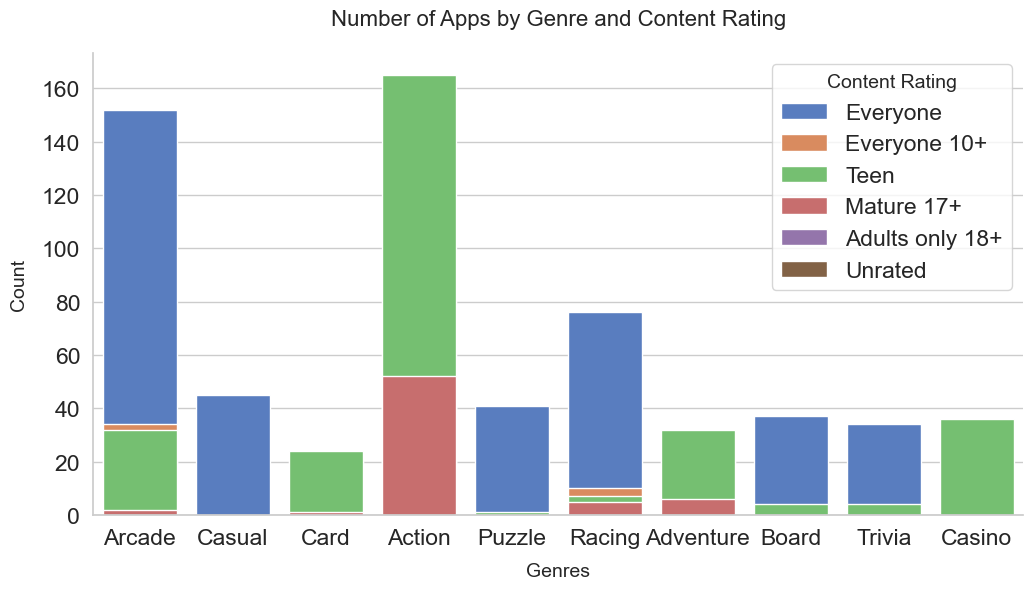

In [64]:
genres_data = game_data[game_data['Genres'].isin(['Action', 'Arcade', 'Racing', 'Adventure', 'Card', 'Casual', 'Board', 'Puzzle', 'Casino', 'Trivia'])]

plt.figure(figsize=(12, 6))
sns.set(style='whitegrid', font_scale=1.5, palette='rocket')

chart = sns.countplot(
    x=genres_data['Genres'],
    hue=genres_data['Content Rating'],
    palette='muted',
    hue_order=['Everyone', 'Everyone 10+', 'Teen', 'Mature 17+', 'Adults only 18+', 'Unrated'],
    dodge=False
)

chart.set_xlabel('Genres', labelpad=10, fontsize=14)
chart.set_ylabel('Count', labelpad=10, fontsize=14)
chart.set_title('Number of Apps by Genre and Content Rating', pad=20, fontsize=16)

plt.legend(title='Content Rating', title_fontsize='14')
sns.despine()

plt.show()


# Conclusion

We can conclude that most of apps are free. Leaders by count are Action, Arcade, Racing, and Adventure and people prefer installing Arcade, Action, Casual, Racing, and Puzzle. Arcade, Action and Racing are mass games. Popular ratings from all apps are Everyone & Teen. 
**Finally, although Casual is not in the top of apps count on Google Play Store, it has good number of installings (top 3) and users of this genre are more active (see in 'Count of Review by Genres' chart). This genre is also fit for everyone based on 'Number of Apps by Genre and Content Rating' chart.**